# The Coupons Collector Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(20180117) # Set seed for script RNG

In [2]:
# Notebook parameters
C = 5 # Number of coupons
T = 100000 # Number of trials
maxC = 26 # Max number of coupons for loops

Imagine that boxes of cereals contains each one coupon with face value $1$ to $C$ distributed uniformly at random. You will be eligible for a prize if you collect a full set of coupons $\{1,2,\cdots,C\}$. On average how many boxes of cereals must you open to collect a full set of coupons?

Let us first approach this question expermimentally. For a fixed number of coupons $C$ we can run one trial to collect a full set by keeping track of how many coupons of each value we have collected and continue to generate new boxes until we have collected at least one of each coupon. 

The run_trial function below will does this and returns how many boxes were necessary to complete our collection on this trial.

In [3]:
def run_trial(_couponCount):
    """ One attempt at collecting a set of coupons
    
    Generates one new coupons between 0 and _couponCount - 1 until a full set is discovered.
    
    Args:
        _couponCount: integer, number of coupons that need to be collected for a full set
    
    Returns:
        boxCount: integer, the number of boxes it took to collect a full set of coupons
    
    """
    couponsDist = np.zeros(_couponCount)
    boxCount = 0
    while np.prod(couponsDist) == 0:
                newCoupon = np.random.randint(low = 0, high = _couponCount)
                couponsDist[newCoupon] += 1
                boxCount += 1
    return boxCount;

The next step is to run many trials and collect the distribution of the number of boxes it took to complete our collection on each trial.

The run_sample function below does this.

In [4]:
def run_sample(_trialsCount, _couponCount):
    """ Runs several trials to collect a set of coupons
    
    Runs the run_trial functions a fixed number of times and collect the number of boxes after which a full set was collected for each trial.
    
    Args:
        _trialsCount: integer, number of trials.
        _couponCount: integer, number of coupons that need to be collected for a full set.
        
    Returns:
        boxCountList: list of integers, each element is the number of boxes it took to collect a full set of coupons in a trial.
    
    """
    boxCountList = []
    for i in range(_trialsCount):
        boxCountList.append(run_trial(_couponCount))
    return boxCountList;

We can run such a series of trials for $C = 5$ and plot the distribution of the number of boxes needed to complete the coupons collection on each trial.

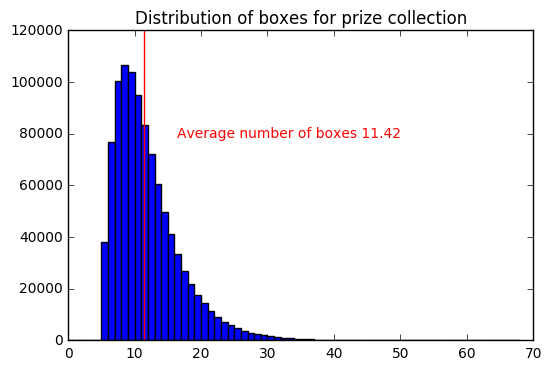

In [5]:
boxCountExample = run_sample(1000000, 5) # Running 10^6 trials for 5 coupons

plt.title("Distribution of boxes for prize collection")
plt.hist(boxCountExample, bins = range(np.max(boxCountExample)), range = (0, np.max(boxCountExample)))
plt.axvline(x = np.mean(boxCountExample), color = 'r')
plt.text(x = np.mean(boxCountExample) + 5, y = 80000, s = "Average number of boxes {:.2f}".format(np.mean(boxCountExample)), rotation=0, verticalalignment='center', color = 'r')
plt.show()

In the case of $5$ coupons we see that it should take approximately $11$ boxes to complete a full set.

We can repeat this process to estimate the average number of boxes necessary to collect a full set of coupons for any $C$. The function get_avgs computes those estimations for up to a maximum number of coupons.

In [6]:
def get_avgs(_trialsCount, _maxCouponCount):
    """ Average number of boxes it takes to complete a coupon set
    
    For each number of coupons calcuates the average number of boxes it took to complete a coupon set.
    
    Args:
        _trialsCount: integer, number of trials.
        _maxCouponCount: integer, will compute averages for all coupon sets up to _maxCouponCount - 1.
        
    Returns:
        avgBoxCountList: list of integers, item i is the average number of boxes it took to complete a set of i coupons.
    
    """
    avgBoxCountList = []
    for c in range(_maxCouponCount):
        avgBoxCountList.append(np.mean(run_sample(_trialsCount, c)))
    return avgBoxCountList;

Here we compute the first few of these averages.

    Coupons  Avg_boxes
0         0    0.00000
1         1    1.00000
2         2    2.98684
3         3    5.49414
4         4    8.33842
5         5   11.44383
6         6   14.66514
7         7   18.16179
8         8   21.71745
9         9   25.44459
10       10   29.35482
11       11   33.23557
12       12   37.29436
13       13   41.30725
14       14   45.42733
15       15   49.80491
16       16   54.03433
17       17   58.39051
18       18   62.96353
19       19   67.44913
20       20   72.00836
21       21   76.55545
22       22   81.33431
23       23   85.88256
24       24   90.60144
25       25   95.59433


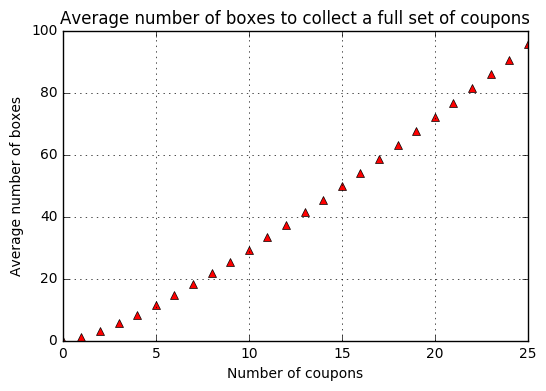

In [7]:
result = get_avgs(T, maxC) # Compute those averages for up to 25 coupons.
resultDict = {'Coupons': range(maxC), 'Avg_boxes': result}
resultDf = pd.DataFrame(resultDict, columns = ['Coupons', 'Avg_boxes']) # Compile the result in a DataFrame
print resultDf

plt.xlabel('Number of coupons')
plt.ylabel('Average number of boxes')
plt.title('Average number of boxes to collect a full set of coupons')
plt.plot(range(maxC), result, 'r^')
plt.grid(True)
plt.show()

So we can solve this question computationally, now let us look at this problem from a combinatorial perspective.

Let $B_{C}$ be the random variable representing the number of boxes needed to collect a set of $C$ coupons. Then our problem is to evaluate its expected value $\mathbb{E}(B_{C})$ which is defined as

$$
\mathbb{E}(B_{C}) = \sum_{n = 0}^{+\infty} \, p_{n}(C) \, n 
$$

where $p_{n}(C)$ is the probability that it takes exactly $n$ boxes to collect the full set of coupons. One way of writting $p_{n}(C)$ is as the probability that $n-1$ boxes has a single missing coupon from the collection multiplied by the probability that the new n-th box has the missing coupon. The latter is simply $1/C$ and we want to compute the former.

Take the simplest non-trivial case of $C = 2$. First of all, $p_{n}(C)$ must be equal to zero for every $n < C$ and we can start counting at $n = 2$. 

The possible sequences of collected coupons of length $1$ are $\{\color{red}{(1)}, \color{red}{(2)}\}$ thus following our strategy $p_2(2) = \frac{2}{2}\times\frac{1}{2}$ which is expected. 

Next let us move on to $n = 3$. The possible sequences of collected coupons of length $2$ are $\{\color{red}{(1,1)}, \color{red}{(2,2)}, (1,2), (2,1) \}$ and $p_{3}(2) = \frac{2}{4}\times\frac{1}{2}$.

For $n = 4$ the possible sequences of collected coupons of length $3$ are $\{\color{red}{(1,1,1)}, \color{red}{(2,2,2)}, (1,1,2), (1,2,1), (2,1,1), (1,2,2), (2,1,2), (2,2,1)\}$. That means $p_{4}(2) = \frac{2}{8}\times\frac{1}{2}$.

At this point we observe that the only sequences of collected coupons of length $n-1$ that do not contain a complete set of coupons already are $(1,1,\cdots,1)$ and $(2,2,\cdots,2)$ out of the $2^{n-1}$ possible combinations. That means in general one can write $p_{n}(2) = \frac{2}{2^{n-1}}\times\frac{1}{2}$ and we get:

$$
\mathbb{E}(B_{2}) = \sum_{n = 2}^{+\infty} \, \frac{2}{2^{n-1}} \, \frac{1}{2} \, n \,.
$$

Since $\frac{n}{2^n} \leq (\frac{1}{2})^n$ for $n$ large enough then this series is convergent. And we can evaluate its sum numerically as:

In [8]:
# Some code for numerical evaluation of the power series.

Next stop is to look at $C = 3$. For $n = 3$ the possible sequences of length $2$ are $\{(1,1), (2,2), (3,3), \color{red}{(1,2)}, \color{red}{(1,3)}, \color{red}{(2,1)}, \color{red}{(2,3)}, \color{red}{(3,1)}, \color{red}{(3,2)}\}$ which means that $p_{3}(3) = \frac{6}{9} \times \frac{1}{3}$.

For $n = 4$ the set of all possible sequences of length $3$ is:

$\{(1,1,1), (2,2,2), (3,3,3), (1,2,3), (2,1,3), (2,3,1), (3,2,1), (1,3,2), (3,1,2), \color{red}{(1,1,2)}, \color{red}{(1,2,1)}, \color{red}{(2,1,1)}, \color{red}{(2,2,1)}, \color{red}{(2,1,2)}, \color{red}{(1,2,2)}, \color{red}{(1,1,3)}, \color{red}{(1,3,1)}, \color{red}{(3,1,1)}, \color{red}{(3,3,1)}, \color{red}{(3,1,3)}, \color{red}{(1,3,3)}, \color{red}{(2,2,3)}, \color{red}{(2,3,2)}, \color{red}{(3,2,2)}, \color{red}{(3,3,2)}, \color{red}{(3,2,3)}, \color{red}{(2,3,3)},\} $.

Thus we find that $p_{4}(3) = \frac{18}{27} \times \frac{1}{3}$. At this point we realize that to construct a sequence of elements with length $n-1$ containing exactly $2$ coupons we must pick $2$ coupons, build all sequences of length $n-1$ with those coupons while removing the cases build with only one coupon. That translates into:

$$
p_{n}(3) = \frac{{3 \choose 2} (2^{n-1} - 2)}{3^{n-1}} \times \frac{1}{3} \,.
$$

As a result the average number of boxes needed to collect a set of $3$ coupons can be written as:

$$
\mathbb{E}(B_{3}) = \sum_{n = 3}^{+\infty} \, \frac{(2^{n-1} - 2)}{3^{n-1}} \, n  \,.
$$

With $n\,(\frac{2}{3})^n \leq (\frac{2}{3})^n$ for $n$ large enough this series is convergent and we can evaluate its sum numerically:

In [9]:
# Some code for numerical evaluation of the power series.

$\bf{Theorem}$: For $C$ coupons, the average number of boxes necessary to collect a full set of coupons is given by the convergent power series

$$
\mathbb{E}(B_{C}) = \sum_{n = C}^{+\infty} \, n \, \frac{(C^{n-1} - C + 1)}{C^{n-1}} \,.
$$

$\it{Proof}$: From the above discussion we can derive an expression for the general term of the power series. To construst a sequence of elements with length $n-1$ containing exactly $C-1$ coupons we must pick $C-1$ coupon and build all sequences of length $n-1$ with those coupons while removing the diagonal cases. There are ${C \choose C-1}[(C-1)^{n-1} - (C-1)]$ such sequences which gives:

$$
p_{n}(C) = \frac{{C \choose C-1}[(C-1)^{n-1} - (C-1)]}{C^{n-1}} \, \frac{1}{C}.
$$

The general term of the series representing the average number of boxes necessary to collect a set of $C$ coupons simplifies to:

$$
n \, \frac{(C-1)^{n-1}-C+1}{C^{n-1}} \,
$$

which is bounded by the geometric term $(\frac{C-1}{C})^n$ for $n$ large enough giving us the convergence of the series. $\blacksquare$